In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading the data from the file
data = pd.read_csv("Kc_house_data.csv")

In [2]:
# General information about the data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [3]:
# The first 5 rows from the data
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/09/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/09/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


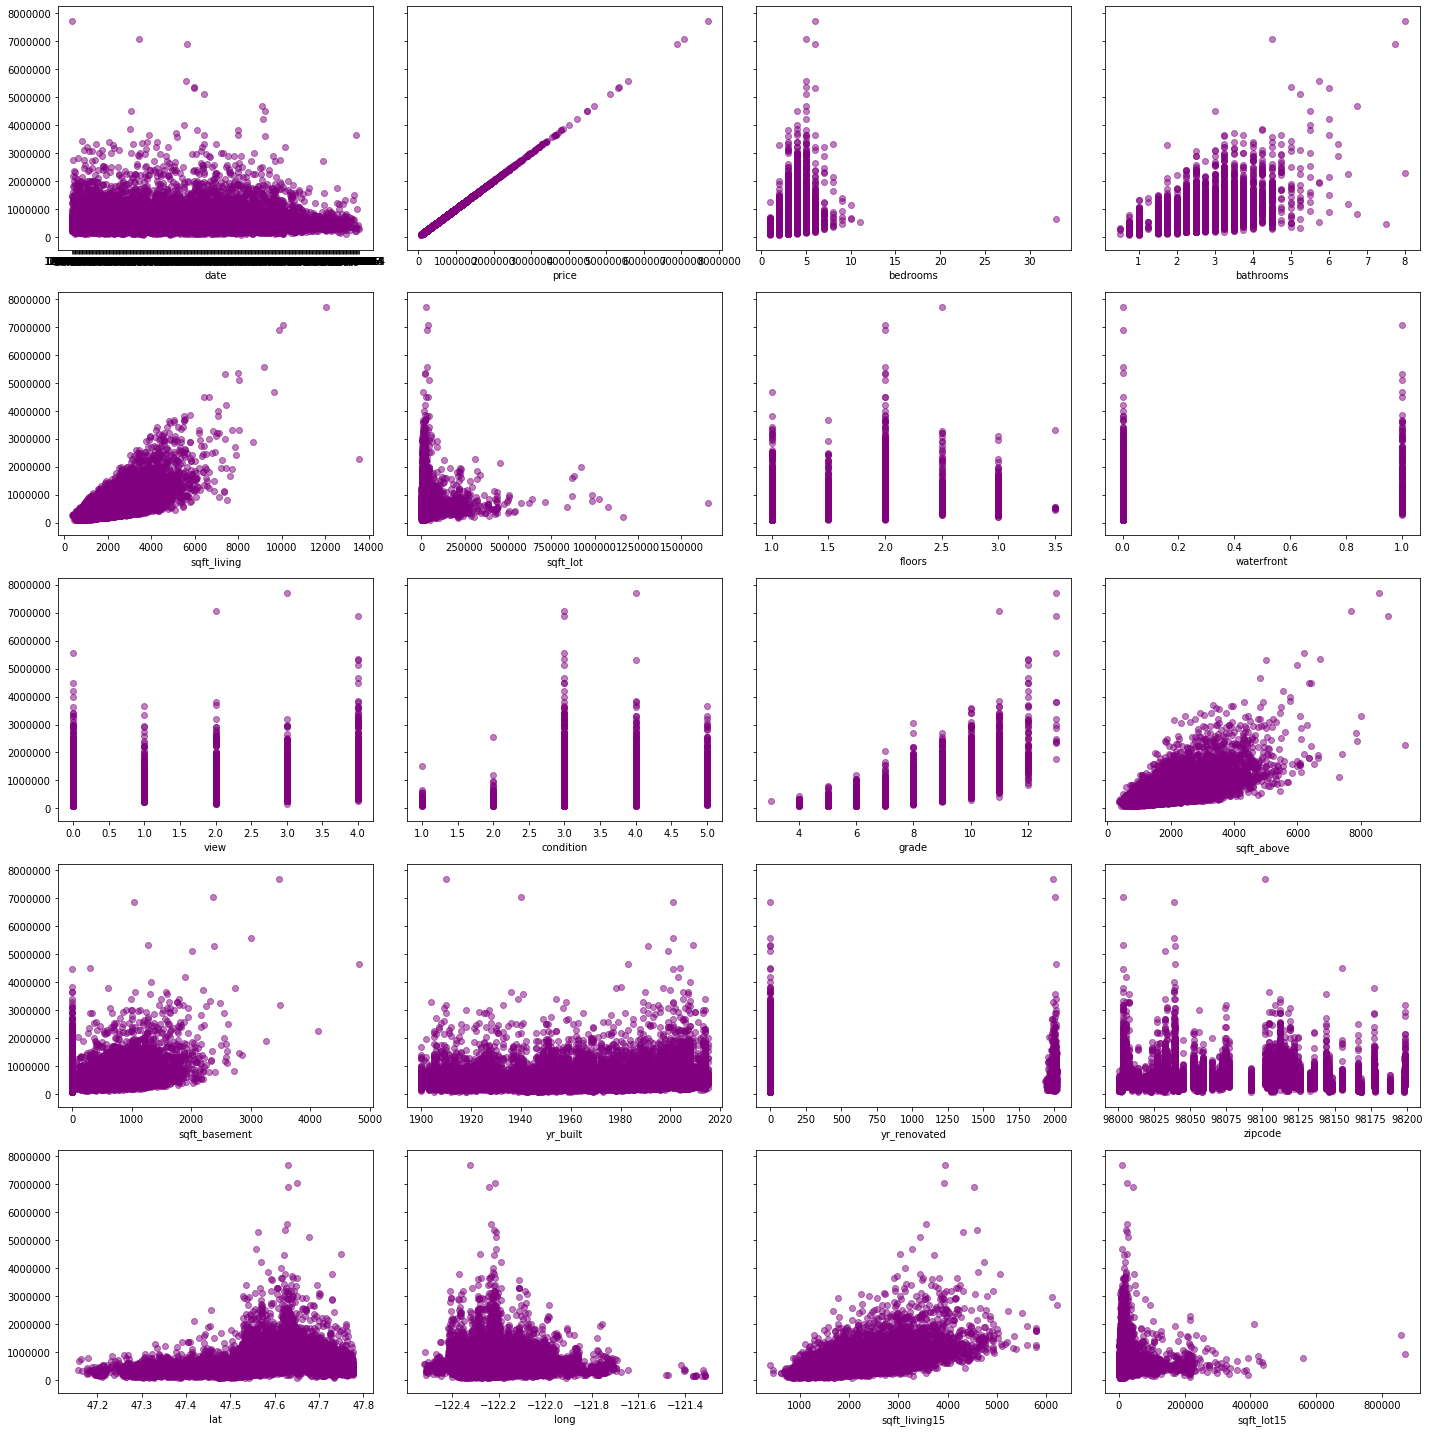

In [4]:
# Getting the feature names from the data
features = data.columns
features = list(features)

# Eliminating irrelevant feature
features.remove('id')

# Getting the price of each sample of the data
price = data.price

# Number of rows in the data
total_samples = len(price)

# Plotting each feature vs the price
fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (20,20), sharey = True)
index = 0
for i in range(0, 5):
    for j in range(0, 4):
        info = np.array(data[features[index]])
        axes[i][j].scatter(info, price, color = 'purple', alpha = 0.5)
        axes[i][j].set_xlabel(features[index])
        index += 1

plt.tight_layout()
plt.show()

In [5]:
# Mean normalization for the data
def mean_normalization(X):
    for i in range(0, len(X)):
        mean = np.mean(X[i])
        maximum = max(X[i])
        
        for j in range(0, len(X[i])):
            X[i][j] = (X[i][j] - mean) / maximum

In [6]:
# Gradient descent for minimizing the cost function
def gradient_descent(X, Y, alpha, iterations):
    m = len(Y)
    
    # Randomly initializing weights
    W = np.random.rand(len(X[0]) + 1) * 10
    
    aux = np.zeros((X.shape[0], X.shape[1] + 1))
    
    for i in range(X.shape[0]):
        aux[i] = np.concatenate(([1], X[i]))

    costs = []
    costs_50 = []
    
    # Repeat the algotihm for n iterations
    for i in range(iterations):
        
        # Make a prediction
        pred = aux.dot(W)
        
        # Get the cost of that prediction
        cost = (1 / 2) * np.mean(np.square(pred - Y))
        costs.append(cost)
        
        if(i % 50 == 0):
            costs_50.append(cost)
        
        # Calculare the gradient
        gradient = (1 / m) * np.dot(aux.T, (pred - Y))
      
        # Modify the weights in the direction of the gradient descent
        W = W - alpha * gradient
    
    return W, costs, costs_50

In [7]:
# Cleaning up features
features.remove('price')
features.remove('date')

In [8]:
# Getting the data for X
X = np.array(data[features])

# Normalizing the data
mean_normalization(X)

In [9]:
# Learning rate of the gradient descent
alpha = 0.1

# Number of times we are going to repeat the gradient descent
iterations = 1000

W, costs, costs_50 = gradient_descent(X, price, alpha, iterations)

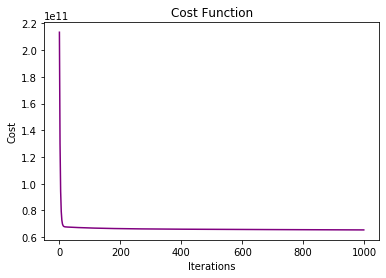

In [10]:
# Plotting the cost function versus the number of iterations
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(costs, color = 'purple')
plt.show()

In [11]:
# The costs each 50 iterations
for i in range(0, len(costs_50)):
    print(costs_50[i])

213431201529.7209
67299131191.6035
66874042964.94085
66581904406.437004
66376657951.24081
66228221797.544876
66116947763.20498
66030001832.90867
65959000334.17169
65898466148.978004
65844820480.59345
65795724384.96616
65749648729.17172
65705593332.882195
65662903539.573135
65621150418.060196
65580052520.33815
65539424779.51112
65499145132.69506
65459132720.04753


In [12]:
W

array([305215.61949412, -79349.56424728, -79312.2126592 , 151978.56848251,
       257106.34149891, -79401.76764591, -79449.68874015, -79345.22133101,
       -79444.24582293, -79163.08307121,  99019.52221352, -26496.32633985,
       -73607.33712787, -60309.72689326, 188328.84904319, -79306.5198545 ,
       -79793.29303264,  65853.10279588, 112765.93538602])